### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 6.2.2 Random Forest Regressor
## White Wine, Outliers Removed, Balanced

#### Audrey Hughes Rager
#### March 24, 2021




## Import Python Packages

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

#Import Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

### Import data

In [2]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
#whitedf = pd.read_csv('whitewinebalanced.csv',sep=";")
df = pd.read_csv('winequality-white-outliers-removed.csv',sep=";")


### Check for null values

In [3]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values.

### Inspect data

In [4]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,2509.315363,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,1414.165983,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,0.000000,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,1269.000000,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,2588.000000,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,3731.500000,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,4897.000000,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


## Set variables X and y

In [6]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

## Balance Data with imblearn

In [7]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(3, 1847), (4, 1847), (5, 1847), (6, 1847), (7, 1847), (8, 1847), (9, 1847)]


## Random Forest Regressor
### Import packages for analysis

In [8]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

### Train-Test-Split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20,random_state=42)


### Scale Independent Variables

In [10]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



### Instantiate the Random Forest Regressor

In [11]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

### Fit the Model to the Training Data

In [12]:
rfrModel = rfr.fit(X_train,y_train)

### Predict Using Test Data

In [13]:
y_pred = rfrModel.predict(X_test)

In [14]:
print(y_pred)

[4.17355519 3.34321317 6.97356893 ... 6.79911212 5.10530629 3.9888777 ]


In [27]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0,0]]))

[5.65013891]


In [28]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0,0]]))

[5.65013891]


### Evaluate the Model

In [29]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [30]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.488
Mean Squared Error (MSE): 0.4386


In [31]:
importance = rfrModel.feature_importances_
importance

array([0.06341014, 0.01274979, 0.07168872, 0.03365242, 0.01966371,
       0.02049281, 0.15890651, 0.01312929, 0.4101494 , 0.02658737,
       0.00814611, 0.16142373])

In [32]:
columns = X.columns

In [33]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

Unnamed: 0              0.063410
fixed acidity           0.012750
volatile acidity        0.071689
citric acid             0.033652
residual sugar          0.019664
chlorides               0.020493
free sulfur dioxide     0.158907
total sulfur dioxide    0.013129
density                 0.410149
pH                      0.026587
sulphates               0.008146
alcohol                 0.161424
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Removed, Balanced)')]

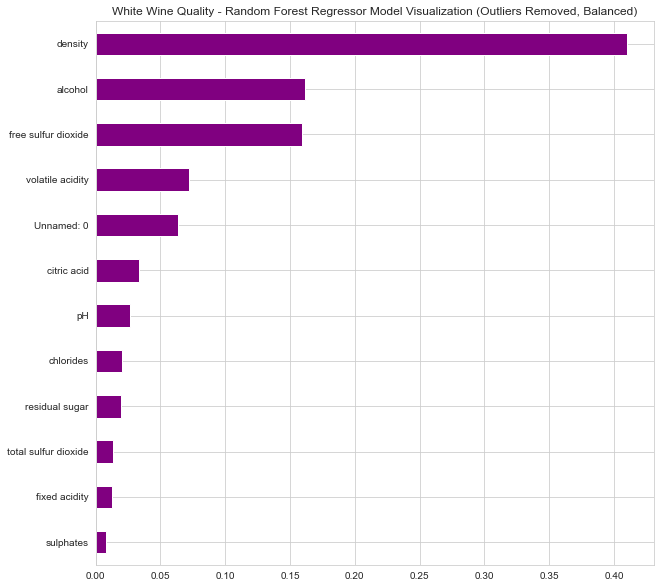

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Removed, Balanced)")]

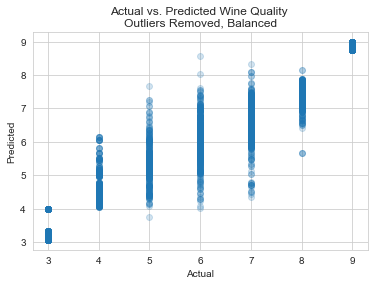

In [35]:
#Plot actual vs. predicted.


plt.scatter(y_test,y_pred,alpha=0.2)
plt.title('Actual vs. Predicted Wine Quality \nOutliers Removed, Balanced') #title
plt.xlabel('Actual') #x label
plt.ylabel('Predicted') #y label
plt.show()

